## CS-ELEC-ML SA#1
Josh Kenn Viray - 3CSC


### Preliminary Information

Dataset Attributes 
The dataset consists of 13 input features and one target variable: 
Input Features: 
1.  CRIM: Per capita crime rate by town. 
2.  ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. 
3.  INDUS: Proportion of non-retail business acres per town. 
4.  CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). 
5.  NOX: Nitric oxides concentration (parts per 10 million). 
6.  RM: Average number of rooms per dwelling. 
7.  AGE: Proportion of owner-occupied units built prior to 1940. 
8.  DIS: Weighted distances to five Boston employment centers. 
9.  RAD: Index of accessibility to radial highways. 
10. TAX: Full-value property-tax rate per $10,000. 
11. PTRATIO: Pupil-teacher ratio by town. 
12. B: Calculated as 1000(Bk−0.63)21000(Bk - 0.63)^21000(Bk−0.63)2, where BkBkBk is 
the proportion of Black residents by town. 
13. LSTAT: Percentage of lower-status population. 
Target Variable: 
1.  MEDV: Median value of owner-occupied homes in $1000's

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from ydata_profiling import ProfileReport

In [2]:
# Load the dataset
data = pd.read_csv('./boston.csv')

### 1. Exploratory Data Analysis

- Perform EDA to gain insights into the data distribution and relationships between 
features. 
- Visualize correlations between the input features and the target variable (MEDV). 
- Identify and handle any missing data or outliers.

In [3]:
# Display the top and bottom 5 rows of the dataset
pd.concat([data.head(), data.tail()])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


<Axes: >

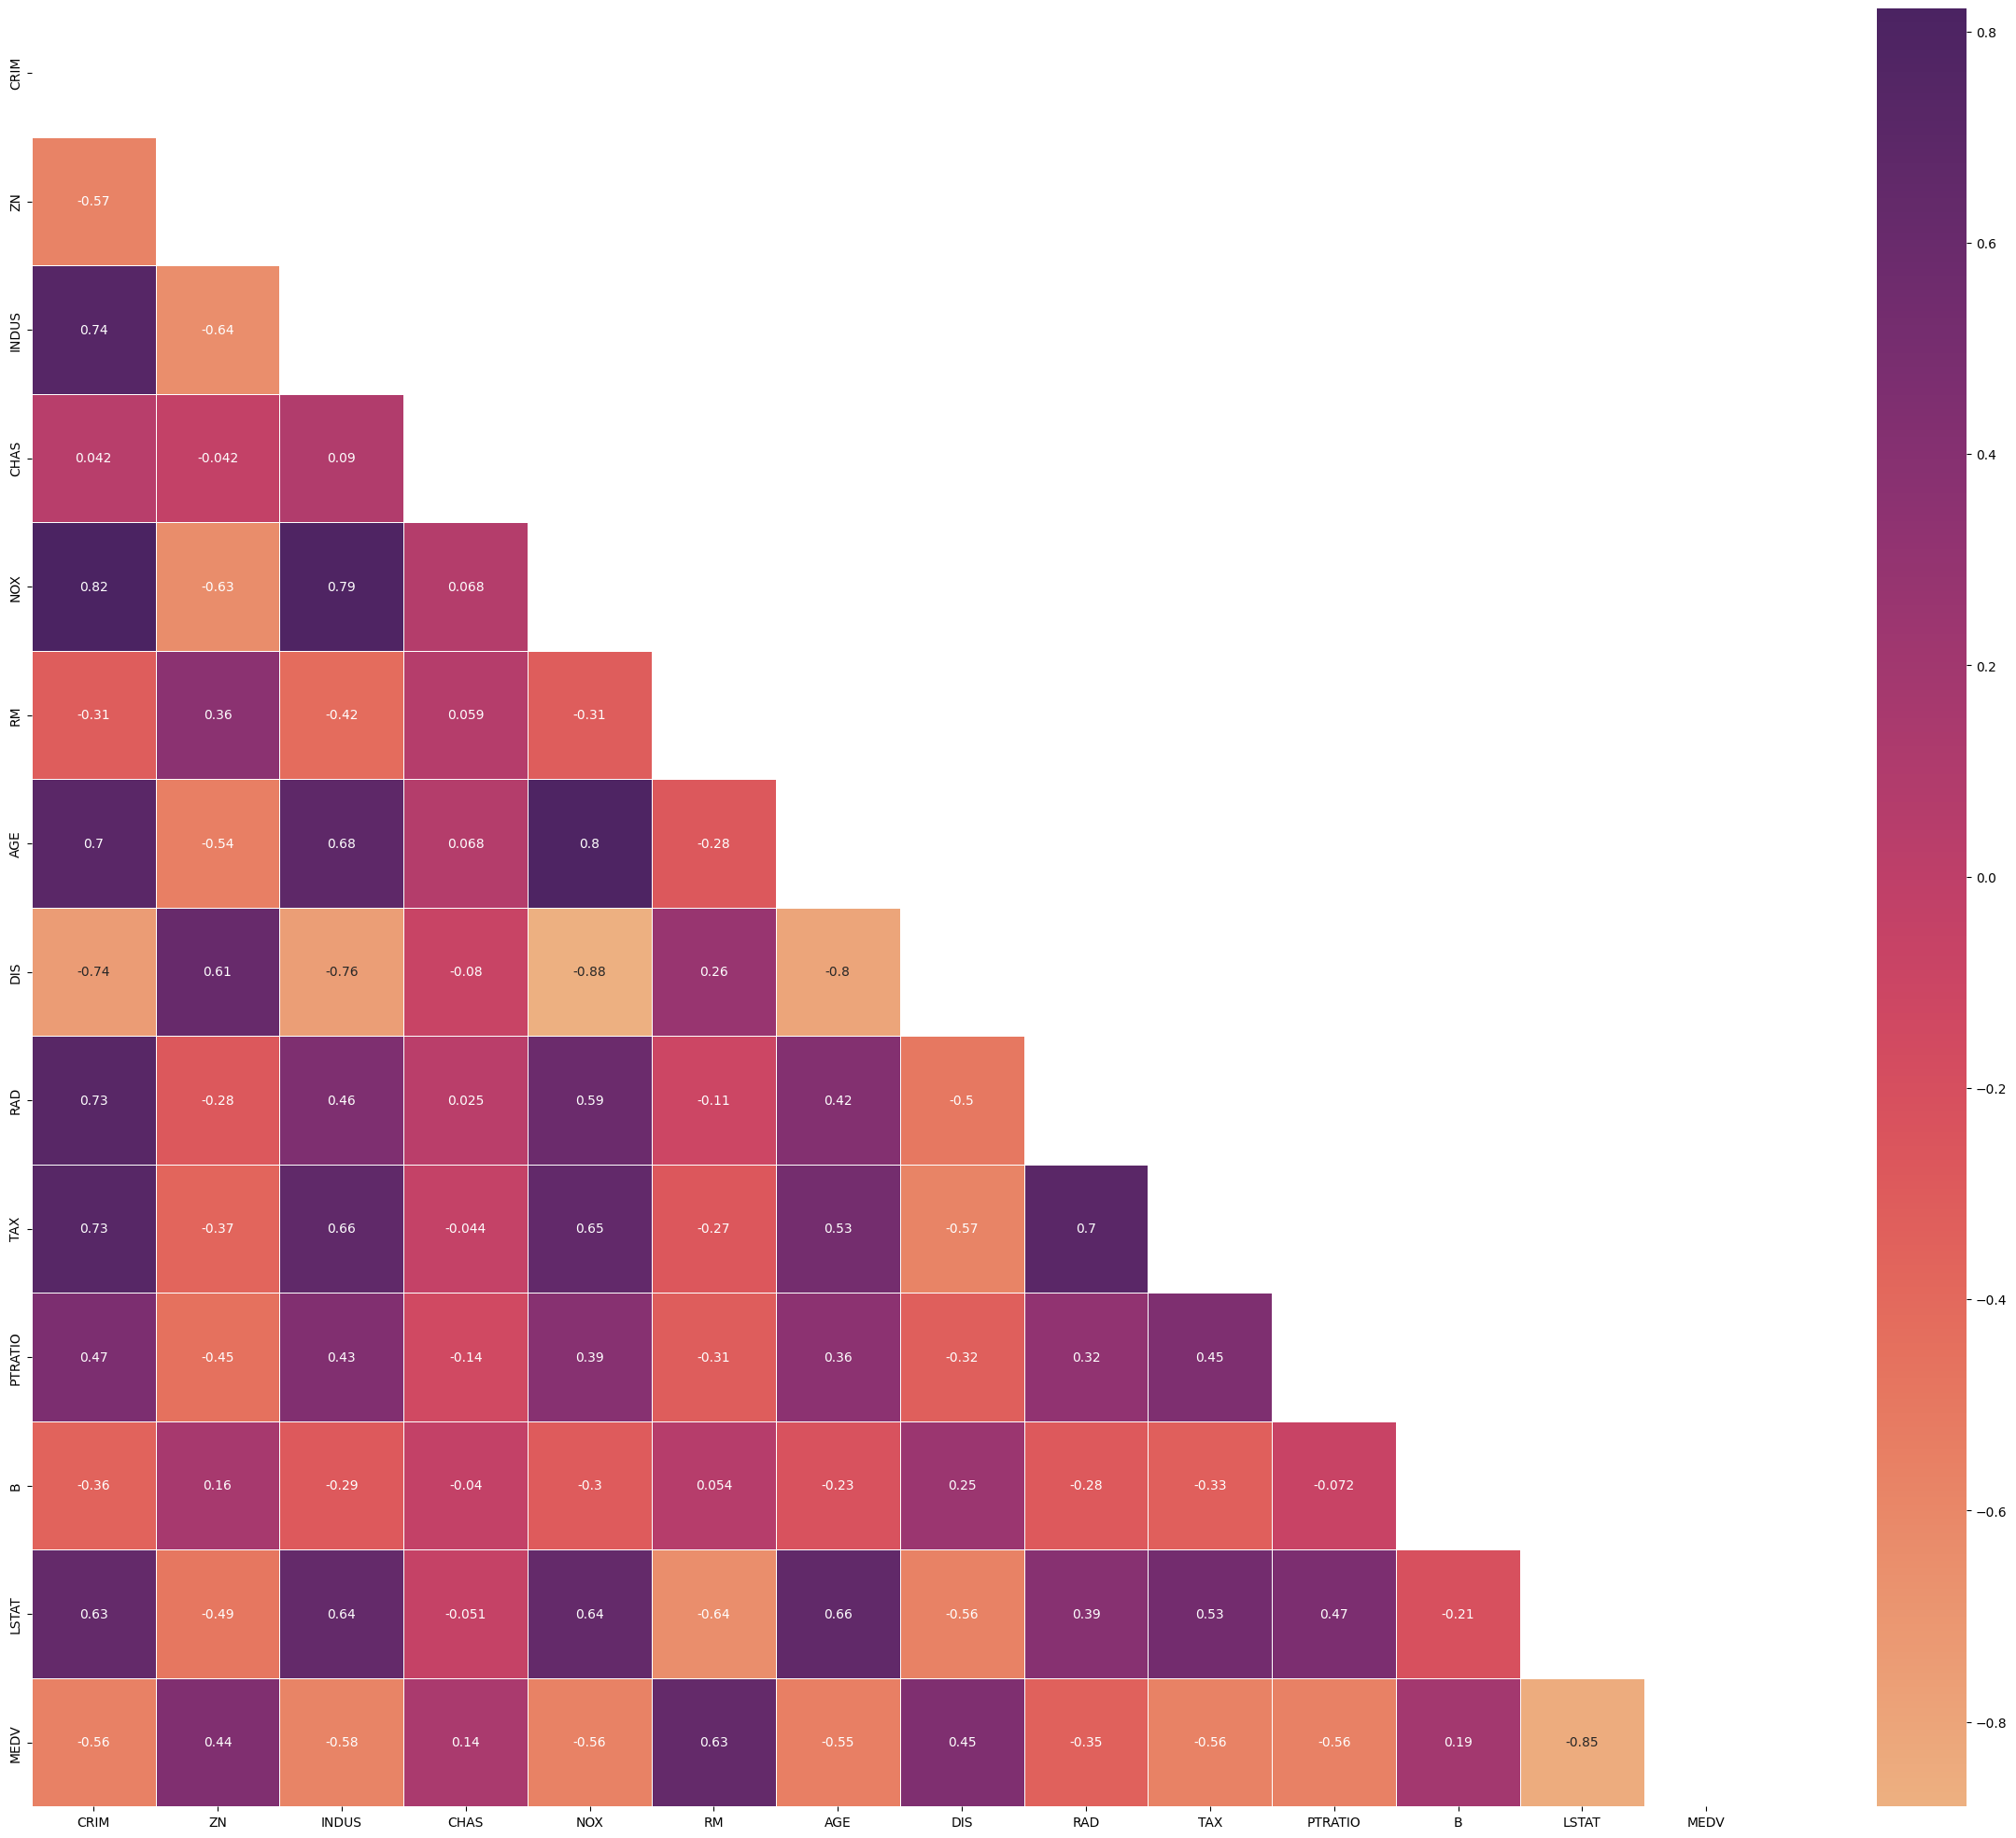

In [4]:
data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


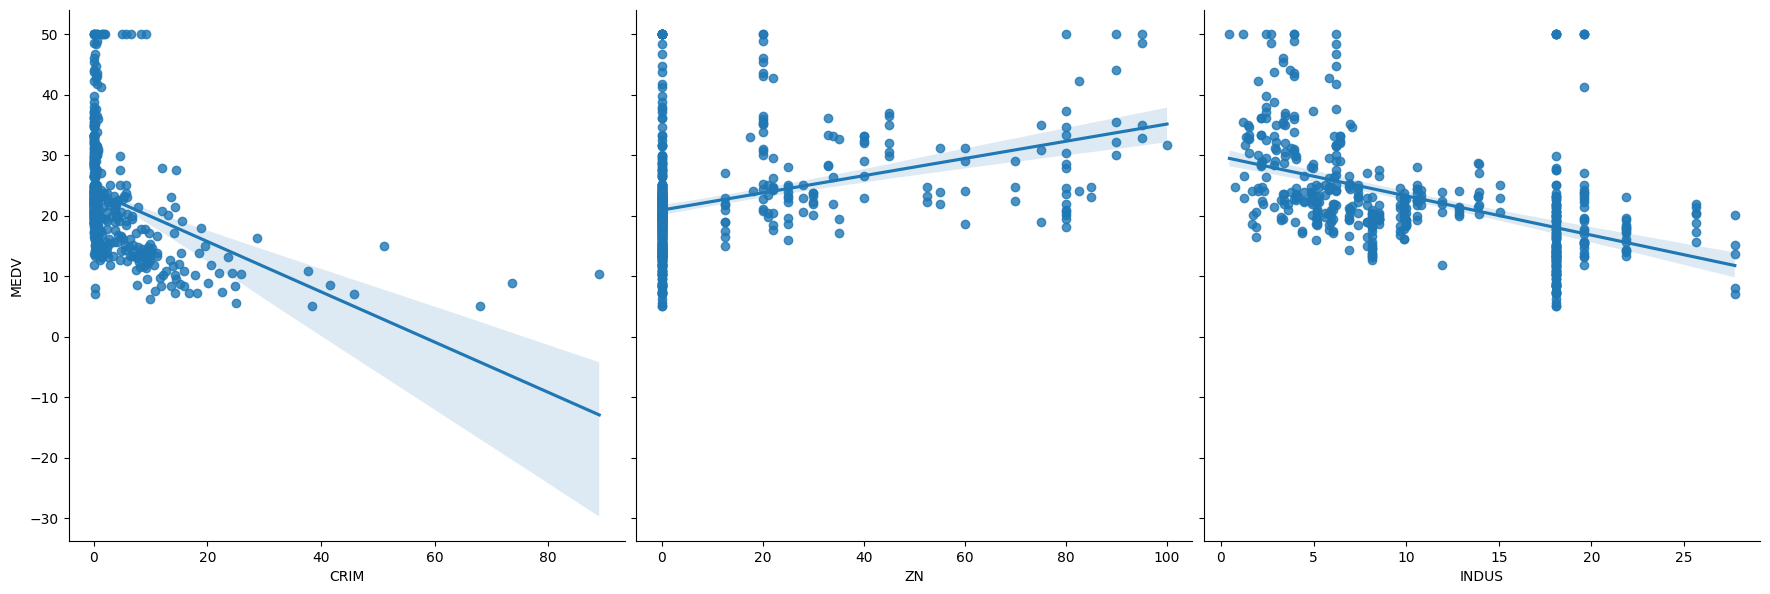

In [10]:
sns.pairplot(data,x_vars=["CRIM","ZN","INDUS"],y_vars =["MEDV"], kind="reg",height=6)

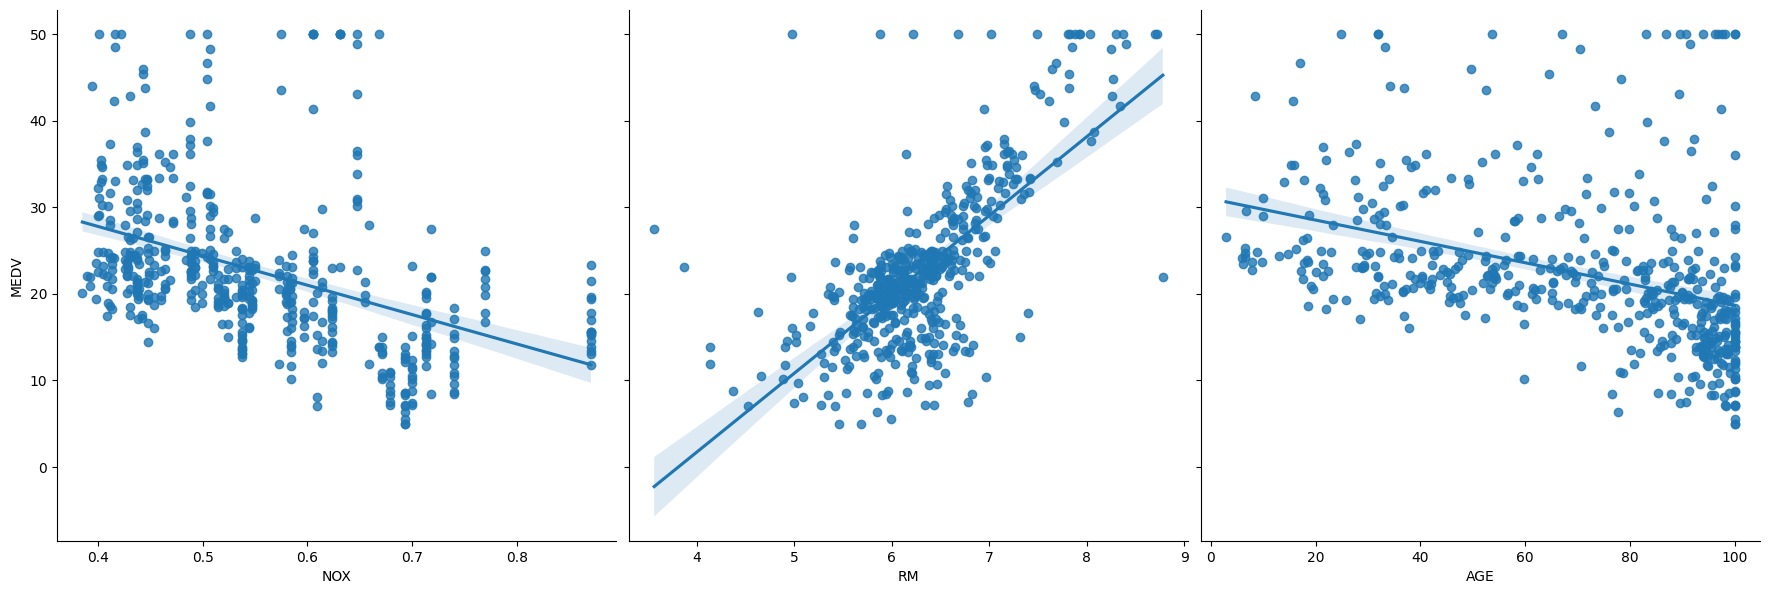

In [11]:
sns.pairplot(data,x_vars=["NOX","RM","AGE"],y_vars =["MEDV"], kind="reg",height=6)

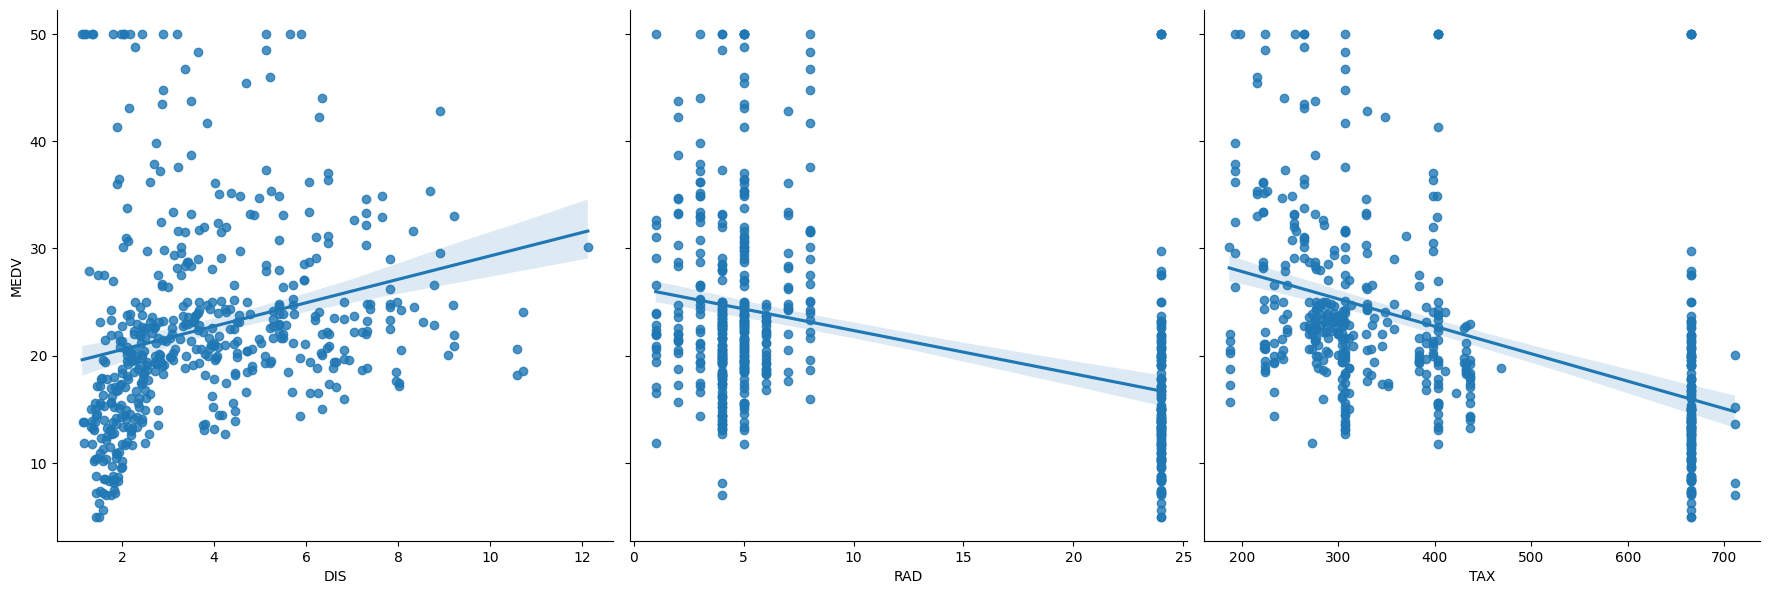

In [12]:
sns.pairplot(data,x_vars=["DIS","RAD","TAX"],y_vars =["MEDV"], kind="reg",height=6)

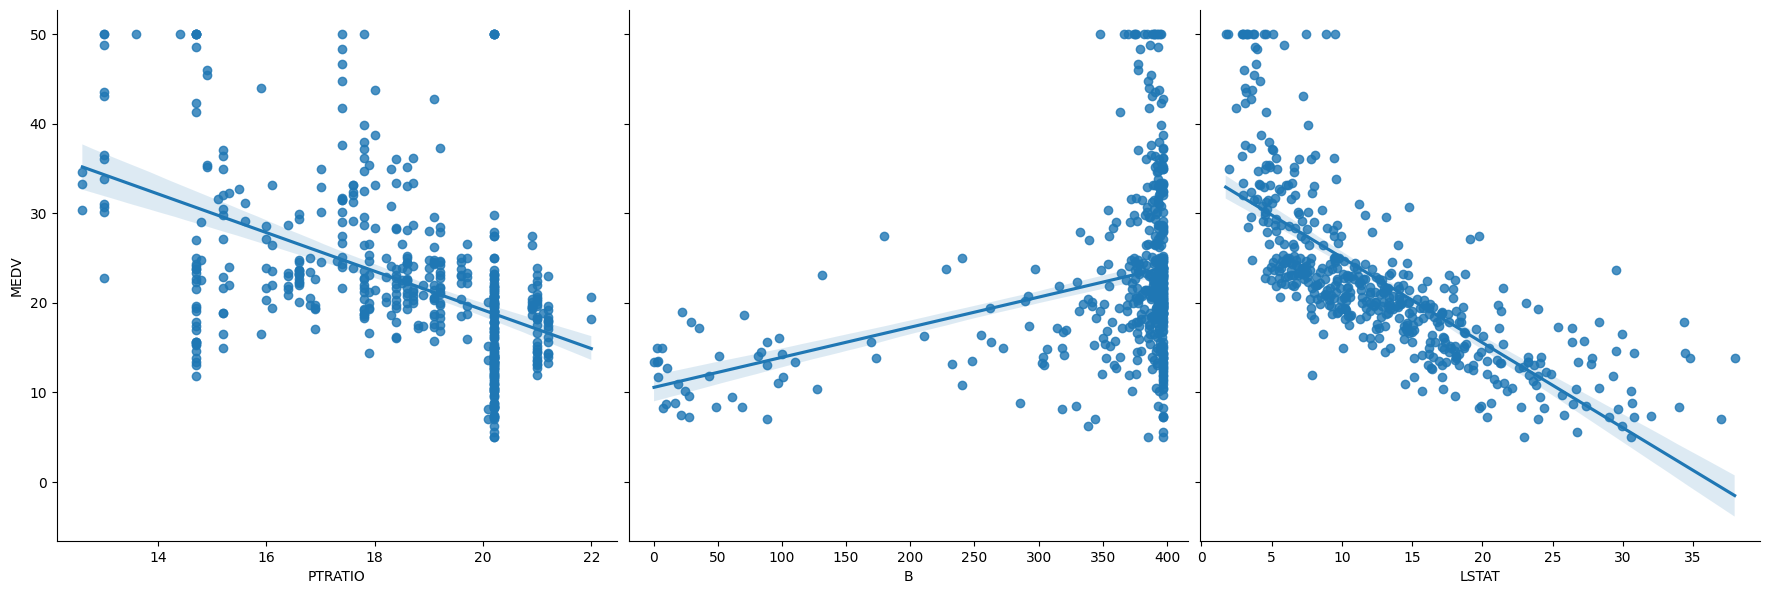

In [13]:
sns.pairplot(data,x_vars=["PTRATIO","B","LSTAT"],y_vars =["MEDV"], kind="reg",height=6)

### Weakly Correlated Features:
1. **CRIM (Per capita crime rate by town):**
   - **Negative correlation** with housing prices: Areas with lower crime rates tend to have higher housing prices, while areas with high crime rates show lower prices.
   - Most areas have a low crime rate, with only a few having higher crime rates.

2. **ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.):**
   - **Positive correlation** with housing prices: Higher proportions of residential land zoning result in higher housing prices.
   - A significant portion of the dataset has low proportions of residential land zoning.

3. **INDUS (Proportion of non-retail business acres per town):**
   - **Negative correlation** with housing prices: As the proportion of non-retail business areas increases, housing prices decrease.

### Moderately to Strongly Correlated Features:
1. **NOX (Nitric oxides concentration):**
   - **Negative correlation** with housing prices: Areas with higher pollution levels (higher NOX concentrations) tend to have lower housing prices. Cleaner air corresponds to higher prices.

2. **RM (Average number of rooms per dwelling):**
   - **Positive correlation** with housing prices: Houses with more rooms generally have higher prices, reflecting the increased size and value. 
   - RM shows a strong correlation with the target variable compared to other features.

3. **AGE (Proportion of owner-occupied units built prior to 1940):**
   - **Negative correlation** with housing prices: Older properties generally have lower prices, and the dataset contains a slightly higher proportion of older houses.

4. **DIS (Weighted distances to five Boston employment centers):**
   - **Positive correlation** with housing prices: Houses closer to employment centers are more expensive, which aligns with common trends in real estate.

5. **RAD (Index of accessibility to radial highways):**
   - **Negative correlation** with housing prices: Houses near highways are less desirable and therefore cheaper. The dataset also shows many areas with low highway accessibility indices and a few with high accessibility.

6. **TAX (Full-value property-tax rate per $10,000):**
   - **Negative correlation** with housing prices: Higher property tax rates are associated with lower housing prices. People prefer areas with lower property taxes.

7. **PTRATIO (Pupil-teacher ratio by town):**
   - **Negative correlation** with housing prices: Areas with better education systems (lower pupil-teacher ratios) tend to have higher housing prices.

8. **B (Proportion of Black residents by town):**
   - **Positive correlation** with housing prices, although this relationship is weak.

9. **LSTAT (Percentage of lower-status population):**
   - **Strong negative correlation** with housing prices: Higher percentages of lower-status populations are associated with lower housing prices. The plot suggests a somewhat curvilinear relationship.

### Key Observations:
- Most features exhibit **linear relationships** with the target variable (MEDV), but not all are strongly correlated.
- We will identify the features that are most significant for prediction during feature selection.
- Given that the target variable (MEDV) is continuous, we will use **regression techniques** to build our predictive model.

## Next Steps:
1. **Implement Multiple Linear Regression:**
   - As a starting point, we will use Multiple Linear Regression to analyze the dataset.

2. **Feature Selection:**
   - We will refine the features to exclude those that do not contribute significantly to the model's performance.

--- 

In [14]:
# Features (X) 
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Target Variable (y)
y = data['MEDV']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v}")


Feature: CRIM, Score: 0.045348043296214495
Feature: ZN, Score: 0.0010117017962211609
Feature: INDUS, Score: 0.005402922857774792
Feature: CHAS, Score: 0.0012040545883731822
Feature: NOX, Score: 0.023347042374102157
Feature: RM, Score: 0.4298517566685811
Feature: AGE, Score: 0.012886960558995538
Feature: DIS, Score: 0.06028115084163224
Feature: RAD, Score: 0.0025169679779300587
Feature: TAX, Score: 0.013781390944635579
Feature: PTRATIO, Score: 0.016130210226699054
Feature: B, Score: 0.010637327989472704
Feature: LSTAT, Score: 0.37760046987936774


### Key Observations
1. **Highly Important Features**:
   - **RM (Average number of rooms per dwelling)** has the highest importance score (0.4299), indicating that it is the most significant predictor of housing prices.
   - **LSTAT (Percentage of lower-status population)** is the second most important feature (0.3776), showing its strong influence on the target variable.

2. **Moderately Important Features**:
   - **DIS (Weighted distances to five Boston employment centers)**: 0.0603
   - **CRIM (Per capita crime rate by town)**: 0.0453
   - **NOX (Nitric oxide concentration)**: 0.0233

3. **Less Important Features**:
   - Features like **ZN**, **CHAS**, and **RAD** have very low importance scores (< 0.01), suggesting they contribute minimally to the model's predictions.

4. **Target Variable Trends**:
   - **RM**: As the number of rooms increases, housing prices typically increase.
   - **LSTAT**: Higher percentages of lower-status populations are associated with lower housing prices.

### Next Steps:
- The model highlights the most critical features for predicting housing prices (`MEDV`), with **RM** and **LSTAT** playing dominant roles.
- Features with very low importance, such as **ZN** and **CHAS**, could potentially be excluded from the model to simplify it without significantly affecting performance later down the line to remove noise.
- However, I will continue to derive the model with all features **first** then reduce the feature set in order to provide a better model.

In [15]:
correlation_matrix = data.corr()
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_medv)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [16]:
# # Additionally, we can use ydata to have a profile report of the data
# profile = ProfileReport(data, title="Profiling Report")
# profile.to_widgets()

### 2. Data Preprocessing

- Normalization/Scaling: Apply appropriate scaling techniques to ensure the 
features are on a similar scale, which is crucial for linear models. 
- Encoding: Handle categorical variables (if any) using suitable encoding 
methods. 
- Feature Selection: Analyze feature importance and potentially reduce 
dimensionality by selecting relevant features.

In [17]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [18]:
# Check that datatypes of the columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

However, since our task is to predict <b>the median value of owner-occupied homes</b> in boston, we need to select a few features as other columns are not necessarily needed.

In [19]:
categorical_features = ['CHAS']
numerical_features = X.columns.difference(categorical_features)

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])


data_scaled = pd.DataFrame(X_scaled, columns=numerical_features)
data_scaled[categorical_features] = X[categorical_features].reset_index(drop=True)
print(data_scaled.head())

        AGE         B      CRIM       DIS     INDUS     LSTAT       NOX  \
0 -0.120013  0.441052 -0.419782  0.140214 -1.287909 -1.075562 -0.144217   
1  0.367166  0.441052 -0.417339  0.557160 -0.593381 -0.492439 -0.740262   
2 -0.265812  0.396427 -0.417342  0.557160 -0.593381 -1.208727 -0.740262   
3 -0.809889  0.416163 -0.416750  1.077737 -1.306878 -1.361517 -0.835284   
4 -0.511180  0.441052 -0.412482  1.077737 -1.306878 -1.026501 -0.835284   

    PTRATIO       RAD        RM       TAX        ZN  CHAS  
0 -1.459000 -0.982843  0.413672 -0.666608  0.284830     0  
1 -0.303094 -0.867883  0.194274 -0.987329 -0.487722     0  
2 -0.303094 -0.867883  1.282714 -0.987329 -0.487722     0  
3  0.113032 -0.752922  1.016303 -1.106115 -0.487722     0  
4  0.113032 -0.752922  1.228577 -1.106115 -0.487722     0  


data cleaning
removing outliers within the dataset.


In [21]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    lower_limit = data[col].quantile(0.01)
    upper_limit = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

### 3. Model Implementation

- Baseline Model: Start with a simple linear regression model to establish a 
baseline performance. 
- Advanced Models: Implement Ridge Regression, Lasso Regression, and Elastic 
Net to improve the model by addressing overfitting and underfitting issues. 
- Hyperparameter Tuning: Experiment with different hyperparameters (e.g., 
regularization strength) to optimize model performance.

In [22]:
df = data[['TAX', # is necessary because it provides us with the value of the property tax 
           'INDUS', # proportion of non-retail property/business within the town
           'MEDV', # Median value of owner-occupied homes in $1000's
           'RM', # average number of rooms per dwelling
           'LSTAT', # % lower status of the population
           'DIS', # weighted distances to five Boston employment centres
            'CRIM', # per capita crime rate by town
            'NOX', # nitric oxides concentration (parts per 10 million)
            'PTRATIO', # pupil-teacher ratio by town
            'AGE', # proportion of owner-occupied units built prior to 1940
           ]] 

In [23]:
# Splitting the data into training and testing sets
X = df[ [ 'TAX', 'INDUS', 'RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE']] # Remove MEDV as a feature
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Feature scaling
scaler = StandardScaler()

# Features to scale
features_to_scale = [ 'TAX', 'INDUS', 'RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'AGE']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

Linear Regression Mean Squared Error (MSE): 25.061284712038326
Linear Regression R-squared (R2): 0.6553609567907437


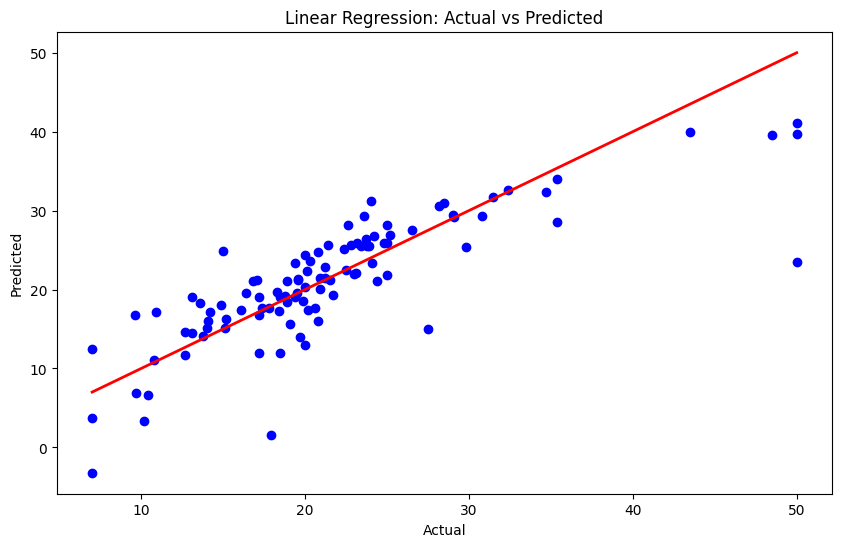

In [25]:
def linear_regression(X_train, y_train, X_test, y_test):
  # Create and train the linear regression model
  linear_model = LinearRegression()
  linear_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred_linear = linear_model.predict(X_test)

  # Evaluate the linear regression model
  mse_linear = mean_squared_error(y_test, y_pred_linear)
  r2_linear = r2_score(y_test, y_pred_linear)

  print(f"Linear Regression Mean Squared Error (MSE): {mse_linear}")
  print(f"Linear Regression R-squared (R2): {r2_linear}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_linear, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Linear Regression: Actual vs Predicted')
  plt.show()

  return linear_model, y_pred_linear

linear_model, y_pred_linear = linear_regression(X_train, y_train, X_test, y_test)

Implement Ridge Regression, Lasso Regression, and Elastic Net

Ridge Regression Mean Squared Error (MSE): 25.32585471015135
Ridge Regression R-squared (R2): 0.6517226297033958


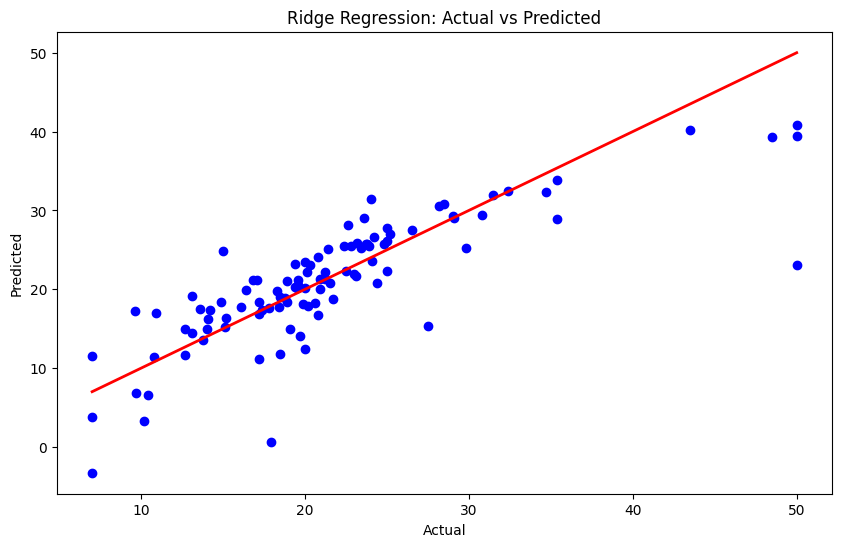

In [26]:
def ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0):
  # Implementing Ridge Regression
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_ridge = ridge_model.predict(X_test)

  # Evaluating the Ridge Regression model
  mse_ridge = mean_squared_error(y_test, y_pred_ridge)
  r2_ridge = r2_score(y_test, y_pred_ridge)

  print(f"Ridge Regression Mean Squared Error (MSE): {mse_ridge}")
  print(f"Ridge Regression R-squared (R2): {r2_ridge}")

  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_ridge, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Ridge Regression: Actual vs Predicted')
  plt.show()
  
  return ridge_model, y_pred_ridge

ridge_model, y_pred_ridge = ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0)

Lasso Regression Mean Squared Error (MSE): 25.75806786010242
Lasso Regression R-squared (R2): 0.6457788990378229


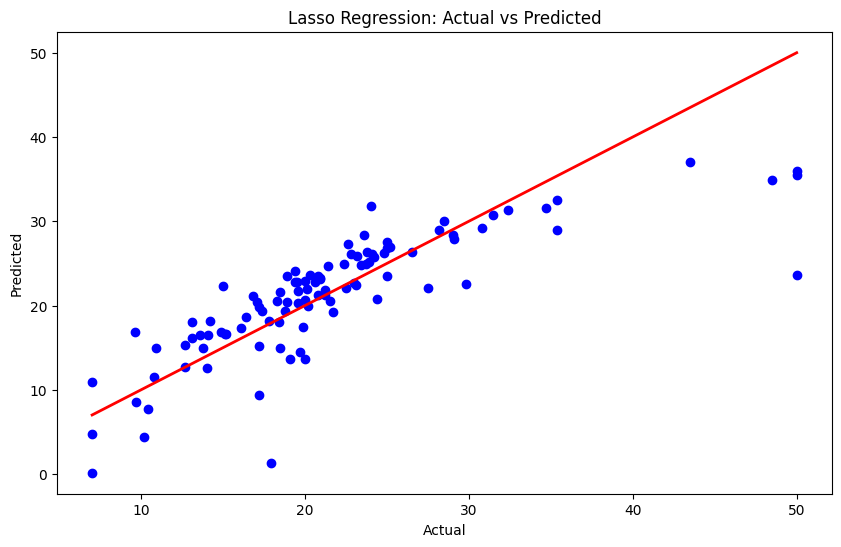

In [27]:
def lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0):
  # Implementing Lasso Regression
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_lasso = lasso_model.predict(X_test)

  # Evaluating the Lasso Regression model
  mse_lasso = mean_squared_error(y_test, y_pred_lasso)
  r2_lasso = r2_score(y_test, y_pred_lasso)

  print(f"Lasso Regression Mean Squared Error (MSE): {mse_lasso}")
  print(f"Lasso Regression R-squared (R2): {r2_lasso}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_lasso, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Lasso Regression: Actual vs Predicted')
  plt.show()

  return lasso_model, y_pred_lasso


lasso_model, y_pred_lasso = lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0)

Elastic Net Regression Mean Squared Error (MSE): 26.053693585360655
Elastic Net Regression R-squared (R2): 0.6417134982304933


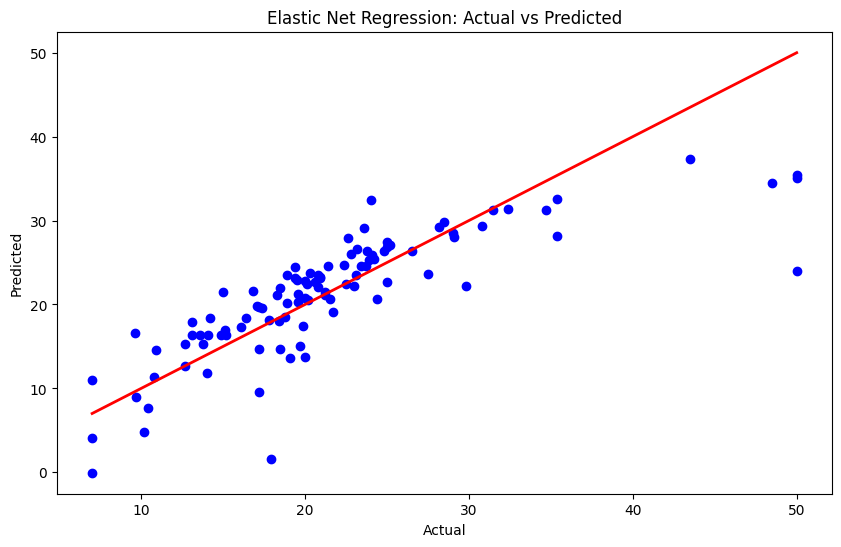

In [28]:
def elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
  # Implementing Elastic Net Regression
  elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
  elastic_net_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred_elastic_net = elastic_net_model.predict(X_test)

  # Evaluating the Elastic Net Regression model
  mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
  r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

  print(f"Elastic Net Regression Mean Squared Error (MSE): {mse_elastic_net}")
  print(f"Elastic Net Regression R-squared (R2): {r2_elastic_net}")

  # Plotting the results
  plt.figure(figsize=(10,6))
  plt.scatter(y_test, y_pred_elastic_net, color='blue')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Elastic Net Regression: Actual vs Predicted')
  plt.show()

  return elastic_net_model, y_pred_elastic_net

elastic_net_model, y_pred_elastic_net = elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5)

Decision Tree Regression MSE: 20.5213
Decision Tree Regression R²: 0.7178


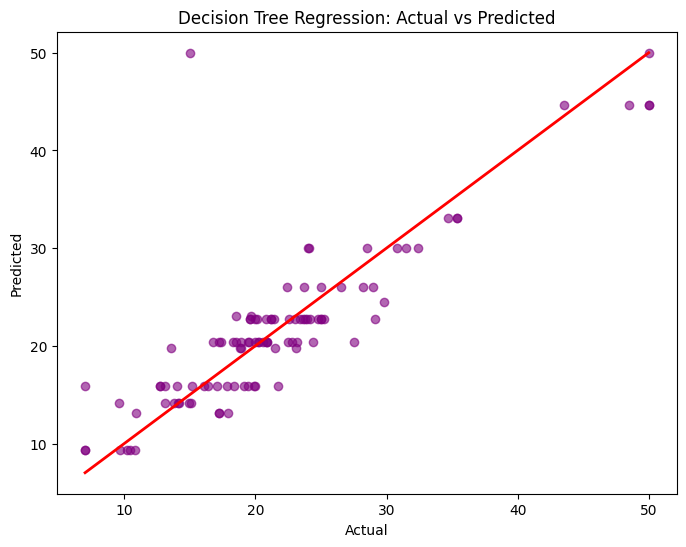

In [29]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regression(X_train, y_train, X_test, y_test, max_depth=None):
    # Initialize and train the model
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = tree_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Decision Tree Regression MSE: {mse:.4f}")
    print(f"Decision Tree Regression R²: {r2:.4f}")
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Decision Tree Regression: Actual vs Predicted')
    plt.show()
    
    return tree_model, y_pred

tree_model, y_pred_tree = decision_tree_regression(X_train, y_train, X_test, y_test, max_depth=5)


Random Forest Regression MSE: 8.4772
Random Forest Regression R²: 0.8834


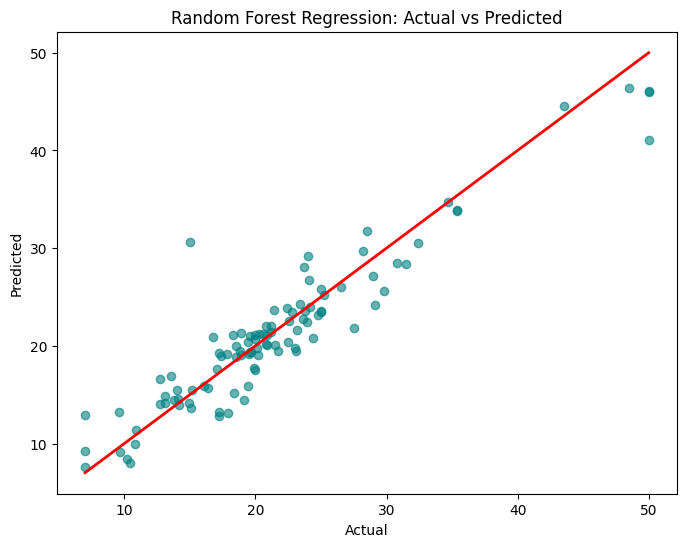

In [30]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None):
    # Initialize and train the model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Random Forest Regression MSE: {mse:.4f}")
    print(f"Random Forest Regression R²: {r2:.4f}")
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Random Forest Regression: Actual vs Predicted')
    plt.show()
    
    return rf_model, y_pred

rf_model, y_pred_rf = random_forest_regression(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None)


Gradient Boosting Regression MSE: 5.6746
Gradient Boosting Regression R²: 0.9220


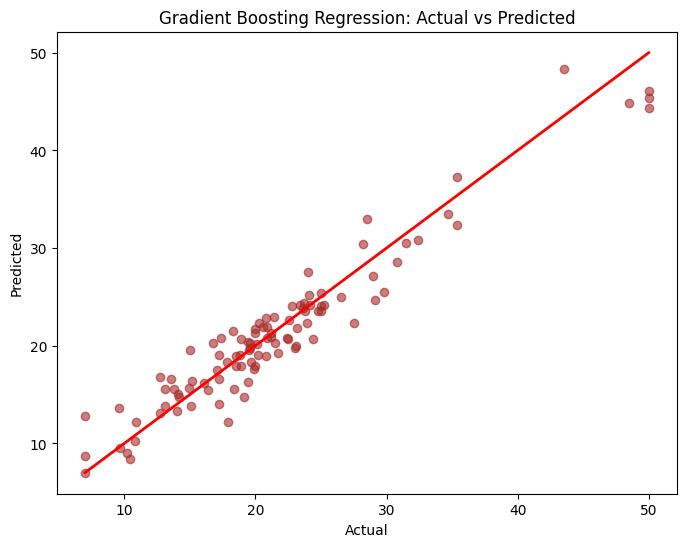

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3):
    # Initialize and train the model
    gb_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
    gb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = gb_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Gradient Boosting Regression MSE: {mse:.4f}")
    print(f"Gradient Boosting Regression R²: {r2:.4f}")
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='brown')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Gradient Boosting Regression: Actual vs Predicted')
    plt.show()
    
    return gb_model, y_pred

gb_model, y_pred_gb = gradient_boosting_regression(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=3)


In [32]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define model
model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Run Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Assign best model
best_model = grid_search.best_estimator_

# Ensure best_model is defined before using it
result = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)

# Display feature importance
feature_importance = sorted(zip(X_train.columns, result.importances_mean), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: LSTAT, Importance: 34.48060796166281
Feature: RM, Importance: 34.46870706140335
Feature: DIS, Importance: 6.52607323467417
Feature: CRIM, Importance: 2.826115621056428
Feature: NOX, Importance: 2.4266335948209505
Feature: PTRATIO, Importance: 2.237349376797991
Feature: AGE, Importance: 0.7370710211229466
Feature: TAX, Importance: 0.7045439963423282
Feature: INDUS, Importance: 0.34089294810972265


### 4. Model Evaluation

- Evaluate the models using metrics such as Mean Squared Error (MSE), 
R-squared (R²), and Root Mean Squared Error (RMSE). 
- Compare the performance of different models and discuss the trade-offs

In [33]:
# Create DataFrame to store the evaluation metrics
mse_eval = pd.DataFrame({
  "Model": ["Linear", "Ridge", "Lasso", "Elastic Net", "DT", "RF", "GB"],
  "MSE": [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_elastic_net),
    mean_squared_error(y_test, y_pred_tree),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_gb),
  ],
})

rsquared_eval = pd.DataFrame({
  "Model": ["Linear", "Ridge", "Lasso", "Elastic Net", "DT", "RF", "GB"],
  "R²": [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_elastic_net),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_gb),
  ],
})

rmse_eval = pd.DataFrame({
  "Model": ["Linear", "Ridge", "Lasso", "Elastic Net", "DT", "RF", "GB"],
  "RMSE": [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic_net)),
    np.sqrt(mean_squared_error(y_test, y_pred_tree)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    np.sqrt(mean_squared_error(y_test, y_pred_gb)),
  ],
})

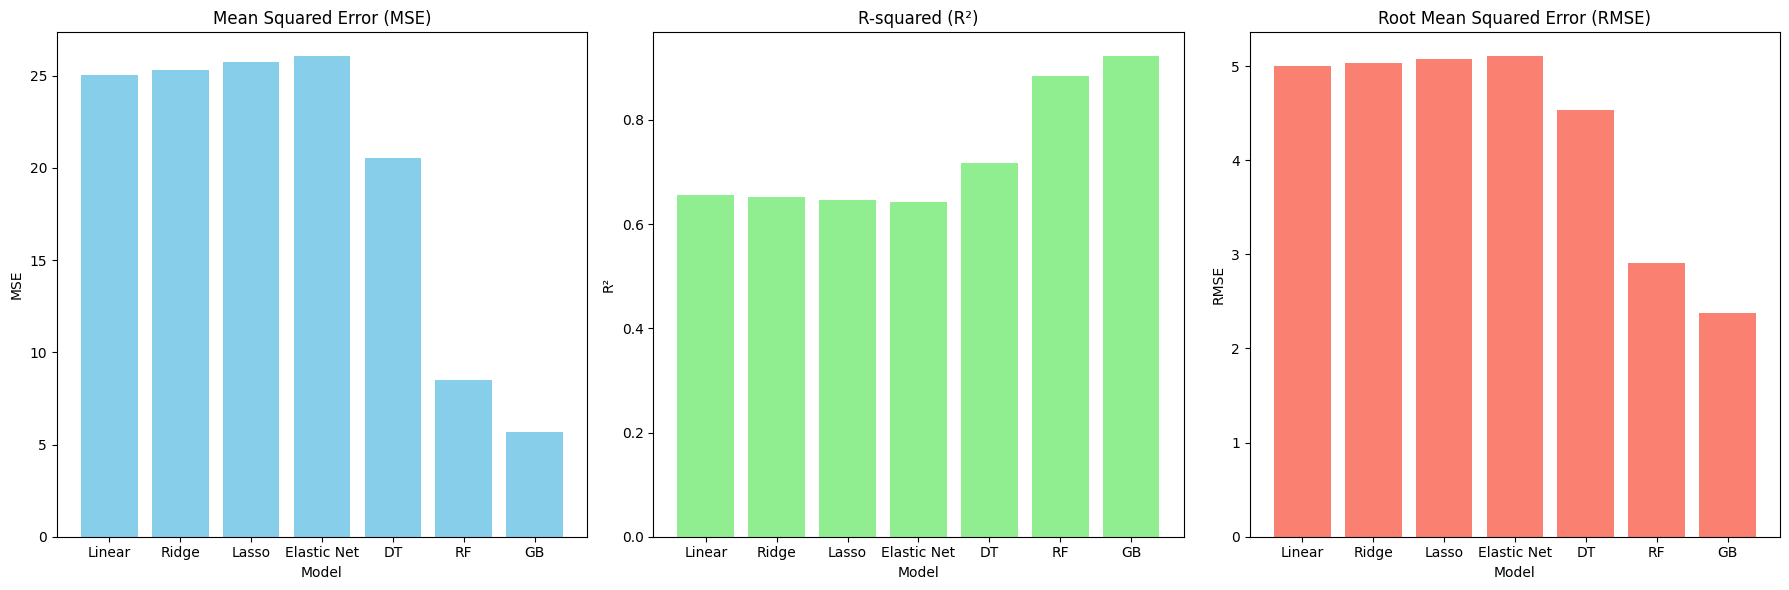

In [34]:
# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Mean Squared Error (MSE)
axes[0].bar(mse_eval['Model'], mse_eval['MSE'], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

# Plotting R-squared (R²)
axes[1].bar(rsquared_eval['Model'], rsquared_eval['R²'], color='lightgreen')
axes[1].set_title('R-squared (R²)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R²')

# Plotting Root Mean Squared Error (RMSE)
axes[2].bar(rmse_eval['Model'], rmse_eval['RMSE'], color='salmon')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

In [35]:
def evaluate_models(X_train, y_train, X_test, y_test):
    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=1.0),
        "Elastic Net Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
        "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    }
    
    results = []  # To store performance metrics
    predictions = {}  # To store predictions for each model

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        predictions[name] = y_pred
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append results
        results.append({
            "Model": name,
            "MSE": mse,
            "R²": r2
        })
    
    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    
    # Display results
    print("\nModel Evaluation Summary:")
    print(results_df)
    
    return results_df, predictions

results_df, predictions = evaluate_models(X_train, y_train, X_test, y_test)



Model Evaluation Summary:
                    Model        MSE        R²
0       Linear Regression  25.061285  0.655361
1        Ridge Regression  25.325855  0.651723
2        Lasso Regression  25.758068  0.645779
3  Elastic Net Regression  26.053694  0.641713
4           Decision Tree  20.521325  0.717794
5           Random Forest   8.477229  0.883422
6       Gradient Boosting   5.674643  0.921963


### 5. Analysis and Interpretation

- Interpret the coefficients of the linear models to understand the impact of each 
feature on the target variable. 
- Discuss the significance of regularization in reducing overfitting. 
- Provide insights into which features are most influential in predicting housing 
prices.

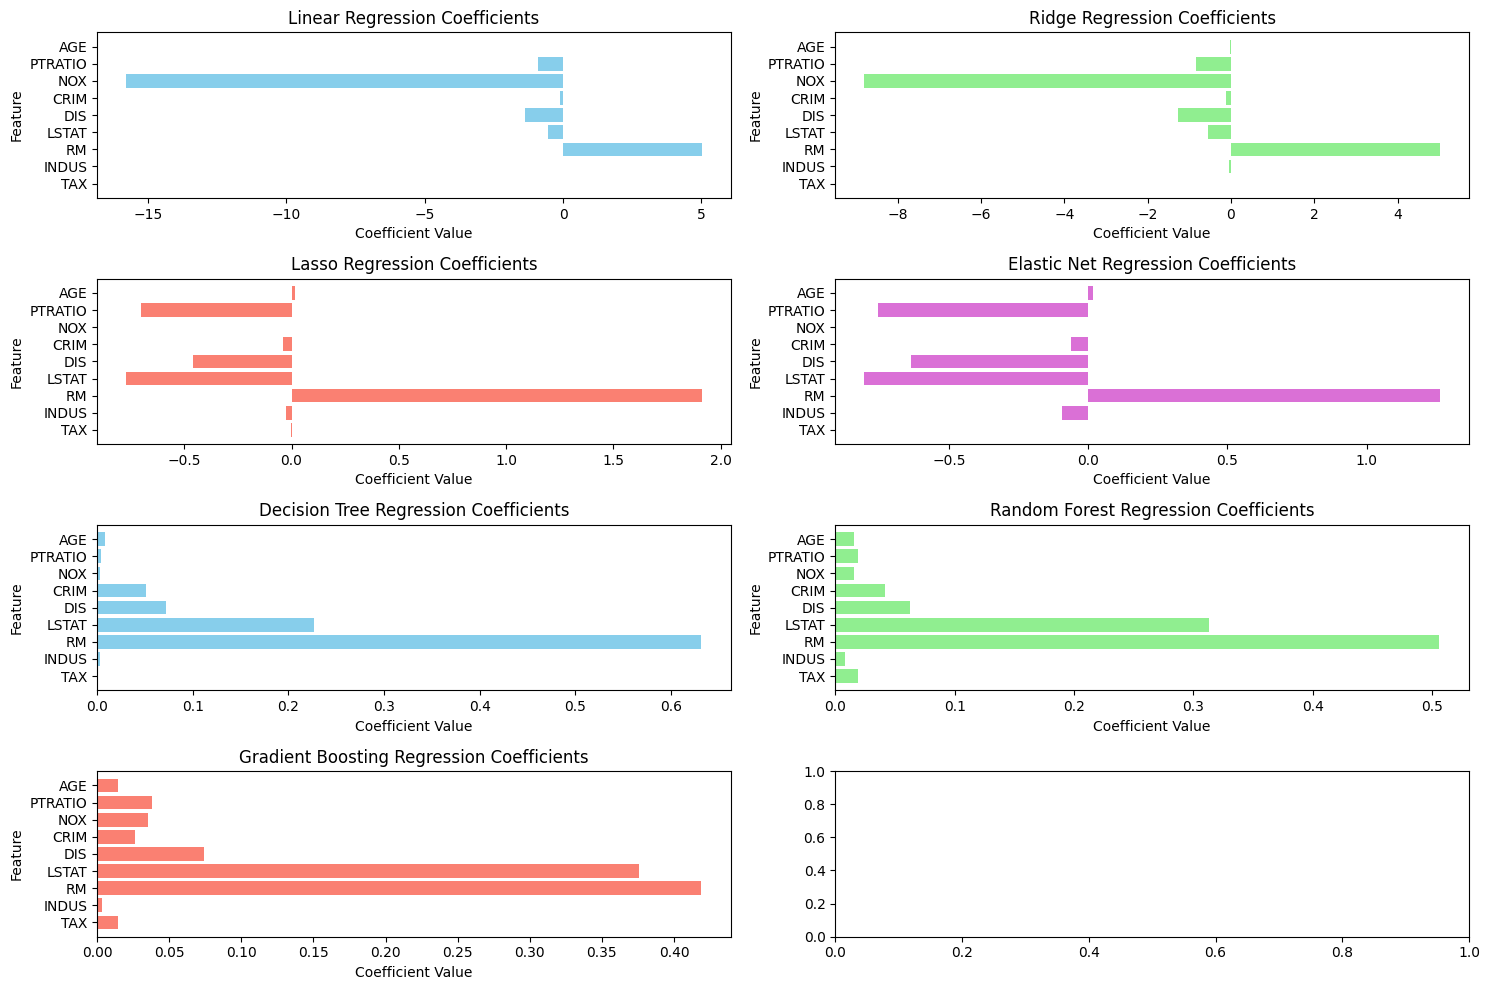

In [36]:
# Extracting coefficients from the linear regression model
linear_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': linear_model.coef_
})

# Extracting coefficients from the ridge regression model
ridge_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': ridge_model.coef_
})

# Extracting coefficients from the lasso regression model
lasso_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': lasso_model.coef_
})

# Extracting coefficients from the elastic net regression model
elastic_net_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': elastic_net_model.coef_
})

# Extracting coefficients from the decision tree regression model
tree_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': tree_model.feature_importances_
})

# Extracting coefficients from the random forest regression model
rf_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': rf_model.feature_importances_
})

# Extracting coefficients from the gradient boosting regression model
gb_coefficients = pd.DataFrame({
  'Feature': X_train.columns,
  'Coefficient': gb_model.feature_importances_
})

# Plotting the coefficients for comparison
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

# Linear Regression Coefficients
axes[0, 0].barh(linear_coefficients['Feature'], linear_coefficients['Coefficient'], color='skyblue')
axes[0, 0].set_title('Linear Regression Coefficients')
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_ylabel('Feature')

# Ridge Regression Coefficients
axes[0, 1].barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'], color='lightgreen')
axes[0, 1].set_title('Ridge Regression Coefficients')
axes[0, 1].set_xlabel('Coefficient Value')
axes[0, 1].set_ylabel('Feature')

# Lasso Regression Coefficients
axes[1, 0].barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'], color='salmon')
axes[1, 0].set_title('Lasso Regression Coefficients')
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_ylabel('Feature')

# Elastic Net Regression Coefficients
axes[1, 1].barh(elastic_net_coefficients['Feature'], elastic_net_coefficients['Coefficient'], color='orchid')
axes[1, 1].set_title('Elastic Net Regression Coefficients')
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_ylabel('Feature')

# Decision Tree Regression Coefficients
axes[2, 0].barh(tree_coefficients['Feature'], tree_coefficients['Coefficient'], color='skyblue')
axes[2, 0].set_title('Decision Tree Regression Coefficients')
axes[2, 0].set_xlabel('Coefficient Value')
axes[2, 0].set_ylabel('Feature')

# Random Forest Regression Coefficients
axes[2, 1].barh(rf_coefficients['Feature'], rf_coefficients['Coefficient'], color='lightgreen')
axes[2, 1].set_title('Random Forest Regression Coefficients')
axes[2, 1].set_xlabel('Coefficient Value')
axes[2, 1].set_ylabel('Feature')

# Gradient Boosting Regression Coefficients
axes[3, 0].barh(gb_coefficients['Feature'], gb_coefficients['Coefficient'], color='salmon')
axes[3, 0].set_title('Gradient Boosting Regression Coefficients')
axes[3, 0].set_xlabel('Coefficient Value')
axes[3, 0].set_ylabel('Feature')



plt.tight_layout()
plt.show()

Redo the test with only LSTAT and RM

In [37]:
# Include all of the columns, even if it might not be necessary and introduce noise.
df = data[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] 

In [38]:
# Splitting the data into training and testing sets
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] # Remove MEDV as a feature
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Feature scaling
scaler = StandardScaler()

# Features to scale
features_to_scale = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [40]:
results_df, predictions = evaluate_models(X_train, y_train, X_test, y_test)



Model Evaluation Summary:
                    Model        MSE        R²
0       Linear Regression  23.344792  0.678966
1        Ridge Regression  23.596268  0.675508
2        Lasso Regression  23.922955  0.671015
3  Elastic Net Regression  23.605474  0.675381
4           Decision Tree   8.427346  0.884108
5           Random Forest   7.889411  0.891506
6       Gradient Boosting   5.941231  0.918297


In [41]:
def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, param_grid=None, cv=5):
    if param_grid is None:
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    
    # Initialize model
    model = RandomForestRegressor(random_state=42)
    
    # Perform Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    
    # Perform Permutation Importance
    result = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=10, random_state=42)
    
    # Extract feature importance
    feature_importances = sorted(zip(X_train.columns, result.importances_mean), key=lambda x: x[1], reverse=True)
    
    print("\nFeature Importances:")
    for feature, importance in feature_importances:
        print(f"Feature: {feature}, Importance: {importance}")
    
    return best_model, feature_importances

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Call the function
best_model, feature_importances = train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, param_grid)

Best Parameters: {'max_depth': 20, 'n_estimators': 100}

Feature Importances:
Feature: RM, Importance: 35.36319399305558
Feature: LSTAT, Importance: 34.36681001441829
Feature: DIS, Importance: 7.213755123923747
Feature: CRIM, Importance: 2.419038684832241
Feature: NOX, Importance: 2.4179750113202587
Feature: PTRATIO, Importance: 1.8146608658431318
Feature: AGE, Importance: 1.0785563857756064
Feature: TAX, Importance: 0.475905392150325
Feature: INDUS, Importance: 0.32050941409150724
Feature: RAD, Importance: 0.22649161079738453
Feature: B, Importance: 0.19273156123747368
Feature: ZN, Importance: 0.04096612026143935
Feature: CHAS, Importance: 0.022692582352942203


Therefore, having a model that focuses on a feature set with an importance of >= 0.4 greatly help the model provide an accurate result.

In [42]:
# Splitting the data into training and testing sets
X = df[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'TAX']] # Remove MEDV as a feature
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Feature scaling
scaler = StandardScaler()

# Features to scale
features_to_scale = ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'TAX']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [44]:
results_df, predictions = evaluate_models(X_train, y_train, X_test, y_test)


Model Evaluation Summary:
                    Model        MSE        R²
0       Linear Regression  25.105225  0.654757
1        Ridge Regression  25.513438  0.649143
2        Lasso Regression  25.858984  0.644391
3  Elastic Net Regression  26.396583  0.636998
4           Decision Tree   8.449919  0.883798
5           Random Forest   8.068813  0.889039
6       Gradient Boosting   5.263177  0.927622


In [45]:
best_model, feature_importances = train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, param_grid)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}

Feature Importances:
Feature: RM, Importance: 34.93778001526936
Feature: LSTAT, Importance: 33.89400281329193
Feature: DIS, Importance: 7.163891555202982
Feature: CRIM, Importance: 3.078313782677775
Feature: PTRATIO, Importance: 2.7586560267514835
Feature: NOX, Importance: 2.3594784236327255
Feature: AGE, Importance: 0.8428657339342591
Feature: TAX, Importance: 0.640981148552623


### 6. Documentation: 
- Submit a comprehensive report detailing your methodology, experiments, results, 
and conclusions. 
- The report should be in a 2-column format (IEEE or ACM) and include sections 
such as Introduction, Methodology, Experiments, Results, and Conclusions